<a href="https://colab.research.google.com/github/fabiodemo/Tensorflow-Developer-Certificate/blob/main/Neural%20Network%20Regression/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem, but in our case, we're going to simplify it: preidcting a numerical variable based on some other combination of variables.

TLDR: predicting a number.

In [ ]:
# Import TensorFLow
import tensorflow as tf
print(tf.__version__)

2.9.2


### Creating data to view and to fit


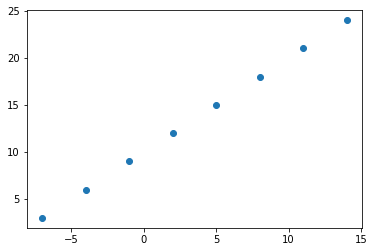

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and output shapes

In [ ]:
# Create a demo tensor for the houing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# Turn Numpy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

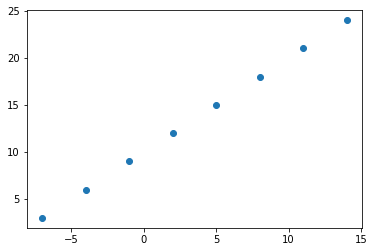

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creatin a model** - define the input and output layers, as well as the hidden layers of a deep learning model;
2. **Compilling a model** - define the loss function (the function which tells our model how wrong it is), the optimizes (tells our model how to improve the ppaterns in its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features & labels)

In [ ]:
# # Optionally, the first layer can receive an `input_shape` argument:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# # Afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))

# model=tf.keras.sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 837ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction using the model
model.predict([17.0])

1/1 [==============================] - 0s 156ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 43ms/step


array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our nodel, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer;
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization funciton;
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild the model

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 659ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 61ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# The prediction will improve
model.predict([17.0])

1/1 [==============================] - 0s 319ms/step


array([[29.739855]], dtype=float32)

In [ ]:
# Improving the model even more

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)    
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 884ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 19ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 28ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 15ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 9ms

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 283ms/step


array([[31.223137]], dtype=float32)

In [ ]:
# Improving the model even more

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)    
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.2895 - mae: 12.2895
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 12.2193 - mae: 12.2193
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 12.1490 - mae: 12.1490
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 12.0786 - mae: 12.0786
Epoch 5/100
1/1 [==============================] - 0s 35ms/step - loss: 12.0081 - mae: 12.0081
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 11.9375 - mae: 11.9375
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 11.8667 - mae: 11.8667
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 11.7959 - mae: 11.7959
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7249 - mae: 11.7249
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6537 - mae: 11.6537
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 149ms/step


array([[31.28524]], dtype=float32)

In [ ]:
# Improving the model even more

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)    
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 813ms/step - loss: 12.5419 - mae: 12.5419
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 11.8482 - mae: 11.8482
Epoch 3/100
1/1 [==============================] - 0s 46ms/step - loss: 11.1529 - mae: 11.1529
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 10.4547 - mae: 10.4547
Epoch 5/100
1/1 [==============================] - 0s 19ms/step - loss: 9.7511 - mae: 9.7511
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 9.0391 - mae: 9.0391
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3156 - mae: 8.3156
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 7.5775 - mae: 7.5775
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 6.9147 - mae: 6.9147
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 6.9004 - mae: 6.9004
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - loss: 7

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 151ms/step


array([[26.868334]], dtype=float32)

🔑 **Common ways to improve a depp model:**

* Adding layers;
* Increase the number of hidden units;
* Change the activation functions;
* Change the optimization function;
* Change the learning rate;
* Fitting for longer.

## Evaluating a model

In practice, a typical workflow you'll go through whe nbuilding neural network is:

```
Build a model -> fit it ->  evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model
```

When it comes to evaluation.. there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - What data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how does the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
 # Making a bigger dataset
 X = tf.range(-100, 100, 4)
 X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Making the labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

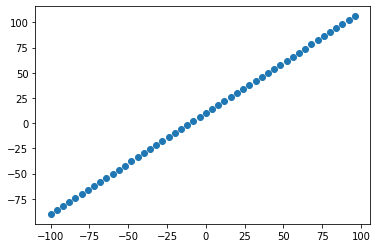

In [ ]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learn from this data, which is tipically 70-80% of the total data available;
* **Validation set** - the model gets turned on this data, which is tipically 10-15% of the total data available
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is tipically 10-15% of the total data available

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualising the data

Now we've got out data in training and test sets... let's visualize it again!

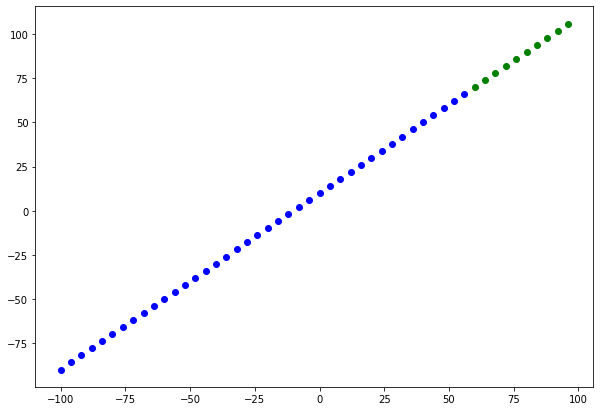

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")

In [ ]:
# Let's have a look at hot to build a Neural Network for our data

# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile a Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Train a model
# model.fit(X_train, y_train, epochs=100)


In [ ]:
# Let's create a model which builds automatically by defining the input argument in the first layer
tf.random.set_seed(42)

# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile a Model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Train a model
# model.fit(X_train, y_train, epochs=100)

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model;
* Trainable params - these are parameters (patterns) the model can update as it trains;
* Non-trainable params - these parameters **aren't** updated during training (this is tipical when bringing in already learn patterns or parameters from other models during **transfer learning**).

In [ ]:
# Let's create a model which builds automatically by defining the input argument in the first layer
tf.random.set_seed(42)

# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile a Model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Train a model
# model.fit(X_train, y_train, epochs=100)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's fit our model to training
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


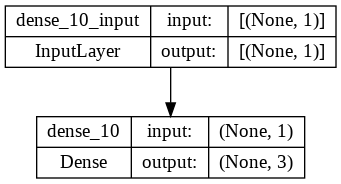

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

In [ ]:
# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
# ], name="one of many models to build")
])


# 2. Compile a Model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Train a model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 73.0019 - mae: 73.0019
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 17.5325 - mae: 17.5325
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 20.4862 - mae: 20.4862
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 13.1871 - mae: 13.1871
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 14.5492 - mae: 14.5492
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 11.6087 - mae: 11.6087
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 12.6668 - mae: 12.6668
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 11.0468 - mae: 11.0468
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 39.7317 - mae: 39.7317
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.2189 - mae: 27.2189
Epoch 11/100
2/2 [==============================] - 

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


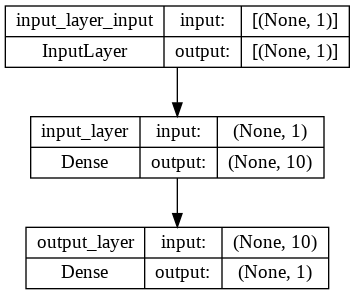

In [ ]:
plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 70.48064 ],
       [ 75.06517 ],
       [ 79.6497  ],
       [ 84.23422 ],
       [ 88.81875 ],
       [ 93.40326 ],
       [ 97.987785],
       [102.57232 ],
       [107.156845],
       [111.74137 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compare predictions to ground truth labels.
  """
  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="blue", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="green", label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="red", label="Predictions")
  plt.legend();

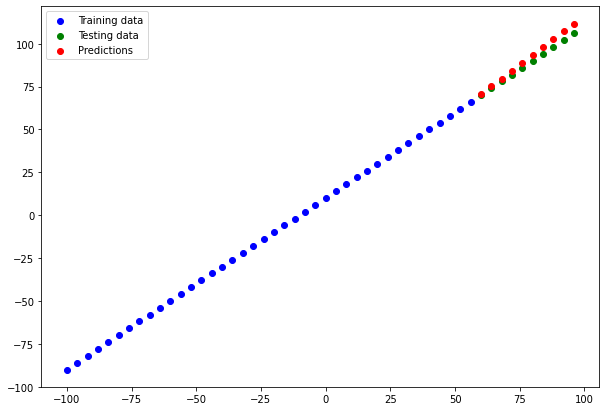

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

#### Trying to improve the model

In [ ]:
# 1. Create a Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer"),
# ], name="one of many models to build")
])


# 2. Compile a Model

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.02),
              metrics=["mae"])

# 3. Train a model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7364 - mae: 18.7364
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 10.0444 - mae: 10.0444
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 9.3459 - mae: 9.3459
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3433 - mae: 10.3433
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7147 - mae: 9.7147
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 8.0603 - mae: 8.0603
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 7.2058 - mae: 7.2058
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4021 - mae: 8.4021
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 7.6489 - mae: 7.6489
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 6.5657 - mae: 6.5657
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 49ms/step


array([[ 69.336105],
       [ 73.28674 ],
       [ 77.237366],
       [ 81.188   ],
       [ 85.13863 ],
       [ 89.08927 ],
       [ 93.0399  ],
       [ 96.99054 ],
       [100.94116 ],
       [104.89181 ]], dtype=float32)

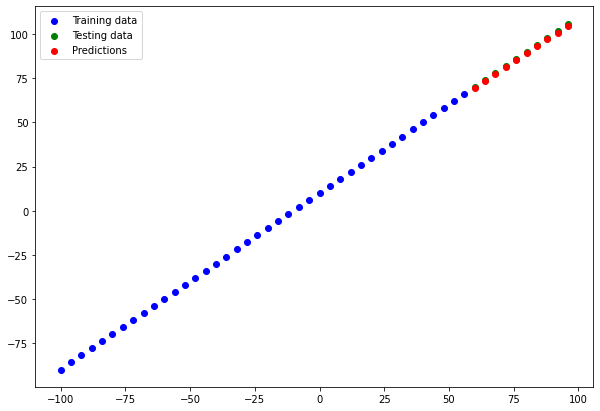

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate the model's performance

Since we're working on a regression, two of the main metrics are:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions";
* MSE - mean square error, "square the average errors".

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 148ms/step - loss: 0.8860 - mae: 0.8860


[0.8860458135604858, 0.8860458135604858]

In [ ]:
y_pred

array([[ 69.336105],
       [ 73.28674 ],
       [ 77.237366],
       [ 81.188   ],
       [ 85.13863 ],
       [ 89.08927 ],
       [ 93.0399  ],
       [ 96.99054 ],
       [100.94116 ],
       [104.89181 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Calculate the mean squared error (MAE)
tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred).numpy()

array([18.663895, 15.370605, 12.85758 , 11.124799, 10.172274, 10.      ,
       10.607981, 11.996216, 14.164698, 17.113445], dtype=float32)

In [ ]:
tf.keras.losses.MAE(y_true=tf.constant(y_test), y_pred=tf.constant(y_pred)).numpy()

array([18.663895, 15.370605, 12.85758 , 11.124799, 10.172274, 10.      ,
       10.607981, 11.996216, 14.164698, 17.113445], dtype=float32)

In [ ]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.663895, 15.370605, 12.85758 , 11.124799, 10.172274, 10.      ,
       10.607981, 11.996216, 14.164698, 17.113445], dtype=float32)>

If we want to calculate the losses, we need to have the tensors in the same shape.

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.336105,  73.28674 ,  77.237366,  81.188   ,  85.13863 ,
        89.08927 ,  93.0399  ,  96.99054 , 100.94116 , 104.89181 ],
      dtype=float32)>

In [ ]:
tf.keras.losses.MAE(y_true=tf.constant(y_test), y_pred=tf.constant(tf.squeeze(y_pred)))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8860466>

In [ ]:
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.8860466>

In [ ]:
# Calcualte the mean square error
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.80518454>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

In [ ]:
mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8860466>

In [ ]:
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.80518454>

### Running experiments to improve our model

"Experiment, experiment, experiment"

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels);
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer;
3. Train for longer - give your model more of a chance to find a pattern in the data.

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

#### Three modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs;
2. `model_2` - 2 layers, trained for 100 epochs;
3. `model_3` - 2 layers, trained for 500 epochs.

In [ ]:
# Model 1

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 6ms/st

1/1 [==============================] - 0s 28ms/step


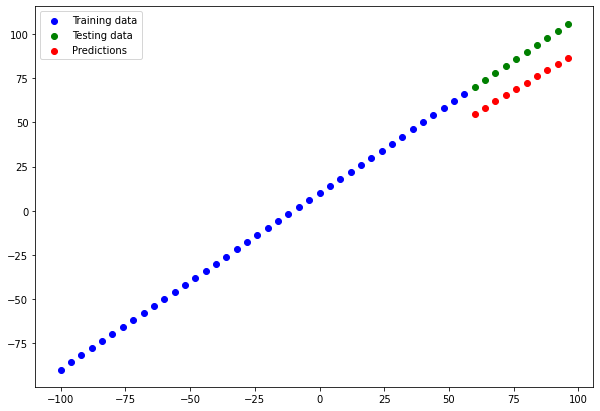

In [ ]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mae(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=17.27238>,
 <tf.Tensor: shape=(), dtype=float32, numpy=17.27238>)

In [ ]:
# Model 2

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 5ms

1/1 [==============================] - 0s 48ms/step


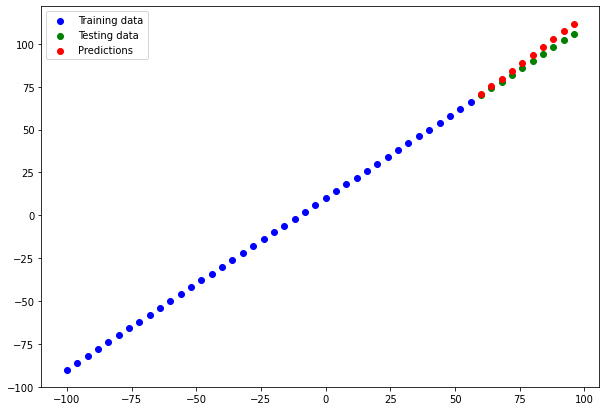

In [ ]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [90]:
# Model 3

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer=tf.keras.optimizers.SGD(), #Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 7ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 49ms/step


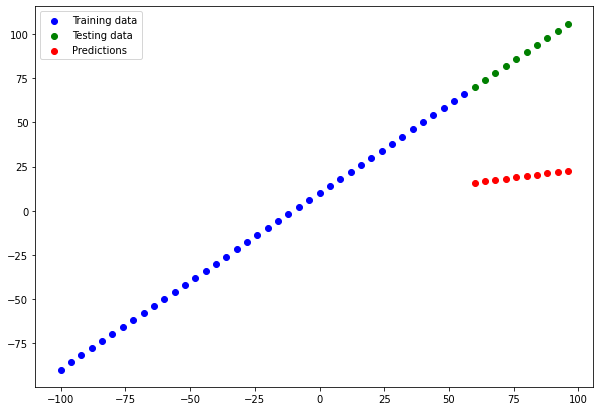

In [91]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [92]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

🔑 **Note:** It's better to start with small experiments (small models) and make sure they work. Then, we can increase their scale if necessary.

### Comparing the results of our experiments

Let's compare the results from the previous models

In [105]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1, mse_1],
                  ["model_2", mae_2, mse_2],
                  ["model_3", mae_3, mse_3]]
                  
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

In [106]:
all_results.mae = all_results.mae.apply(lambda x: x.numpy())
all_results.mse = all_results.mse.apply(lambda x: x.numpy())

In [107]:
all_results

,model,mae,mse
0,model_1,17.272381,17.272381
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [108]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 10)                20        
                                                                 
 dense_18 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of the main goals should be to minimize the time between the experiments. The more experiments are done, the more things will be figured out.

#### Tracing experiments

One really good habit in ML modelling is to track the results of experiments.

And when doing so, it can be tediouif running lots of experiments.

📚 **Resource:** We can use
* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later);
* Weights & Biases - a tool for tracking all kinds of ML experiments (plug straight into TensorBoard).

## Saving models

Saving models allows us to use them outside of Google Colab (or wherever they were trained), such in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel Format;
2. The HDF5 Format.

In [109]:
# Save model using SavedModel
model_2.save("best_model_SavedModel_Format")

In [111]:
# Save model using HDF5 Format
model_2.save("best_model_HDF5_Format.h5")